## **Scraping Data, Converting to CSV**

In [13]:
#importing necessary libraries
!pip install praw
import praw
import pandas as pd
import requests

In [14]:
#Scraping Reddit
# Passing your details
reddit = praw.Reddit(client_id='B_7sEsiwCZSUGMD4NZStDw',
                     client_secret='zLPxTiAlWIrcLEfAM5kVWWLqH55g4g',
                     user_agent='Kavyas App')

In [15]:
#indicating the Reddit post's URL
post_url = 'https://www.reddit.com/r/TikTokCringe/comments/189okga/teachers_keep_saying_kids_cannot_read_is_the/'

In [16]:
# Creating a submission object or a submission (post) from the given url
submission = reddit.submission(url=post_url)

In [17]:
from praw.models import MoreComments			# Importing needed function from praw package

In [ ]:
post_comments = []												# Create an empty list
count = 0
post_comments = []												# Create an empty list
count = 0
submission.comments.replace_more(limit=None) #replacing more comments with all comments
for comment in submission.comments.list():			# Initiate a for loop through the comment forest including top-level comments only
 if isinstance(comment, MoreComments): # This helps to handle objects that has “load more comments” and “continue this thread”.
		continue

post_comments.append(comment.body)			# Append the comment body to the empty list
# print(post_comments)

# creating a dataframe
comments_df = pd.DataFrame(post_comments, columns=['comment'])		# Convert the 'post_comments' list to dataframe and naming the column.
comments_df

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
# Including all the comments within comments
post_comments = []  # Create an empty list

# To include all morecomments (technically expand the morecomments object with actual comments)
# These are all comments,replies, nested comments and replies
submission.comments.replace_more(limit=None)

for comment in submission.comments.list():
# If I loop through submission.comments.list() it will give me comments and their replies
 post_comments.append([comment.body, comment.ups, comment.downs, comment.created]) # Append the comment body to the empty list

# creating a dataframe
# Convert the 'post_comments' list to dataframe and naming the column.
comments_df = pd.DataFrame(post_comments, columns=['comment', 'ups', 'downs', 'created'])
comments_df

In [ ]:
#get the shape of comments now
comments_df.shape

In [ ]:
# Converting the created date to what we can easily read

from datetime import datetime

comments_df['date_time'] = pd.to_datetime(comments_df['created'],  unit='s')    # this passes all the time details, including time. # The unit specify what unit our int is is away from the origin
comments_df['date'] = comments_df['date_time'].dt.strftime('%Y-%m-%d') # Now we have created a formatted string, with only the date

comments_df.head()

In [ ]:
# Remove the duplicate and save data to csv file
comments_df1 = comments_df
comments_df1.drop_duplicates(subset='comment', keep='last', inplace=True)
comments_df1.to_csv('project3_comments.csv', index=True, header=True)
comments_df1.shape #view dimension of data to see how many data points remain after cleaning


In [ ]:
# Importing some libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Importing dataset that contains comments from a reddit post about student education
reddit_data = pd.read_csv('project3_comments.csv')


## **Data Pre-Processing**

In [142]:
# View the columns
reddit_data.columns

Index(['Unnamed: 0', 'comment', 'ups', 'downs', 'created', 'date_time',
       'date'],
      dtype='object')

In [143]:
# Drop unnecessary columns
reddit_data1 = reddit_data.drop(columns = ['Unnamed: 0', 'downs'], axis = 1)  #axis = 1 means operation should be performed on columns
reddit_data1.head()

,comment,ups,created,date_time,date
0,\n**Welcome to r/TikTokCringe!**\n\n This is a...,1,1.701589e+09,2023-12-03 07:43:36,2023-12-03
1,10 year educator. It's so much worse than you ...,2501,1.701607e+09,2023-12-03 12:37:03,2023-12-03
2,There's a podcast that outlines how Lucy Calki...,838,1.701617e+09,2023-12-03 15:30:24,2023-12-03
3,It's bad. Think back to when we were in Late E...,1644,1.701590e+09,2023-12-03 07:52:24,2023-12-03
4,"yes, I work in an education related field, its...",921,1.701593e+09,2023-12-03 08:43:02,2023-12-03


In [144]:
#removing unnecessary symbols and stopwrods
import re                                   #import regular expressions

import nltk                                 #import Natural Language Toolkit library, Python package for working with human language data (NLP)
nltk.download('stopwords')                  #downloads stopwords dataset such as "and", "the", "in", etc from NTLK since they are filtered as they carry less meaning
from nltk.corpus import stopwords           #imports stopwords module to access it
STOPWORDS = set(stopwords.words('english')) #returns a list of English stopwords which is converted into a set since sets provide faster membership checks


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [145]:
#Reddit text cleaning to make it more suitable for NLP tasks

# w_list = []
def reddit_clean (redd):
    redd = str(redd).lower()                            # convert into a lowercase to standardize it
    # re.sub is a function of re that replaces occurences of a pattern in a string with another string
    redd = re.sub("'", "", redd)                        # search for ' , replace with empty string, perform function on redd
    redd = re.sub("@[A-Za-z0-9_]+","", redd)            # matches username, @ symbol followed by 1 or more (+) alphanumeric characters or underscores
    redd = re.sub("#[A-Za-z0-9_]+","", redd)            # matches hashtages, # symbol followed by 1 or more (+) alphanumeric characters or underscores
    redd = re.sub(r"www.\S+", "", redd)                 # r means raw string (treat all characters as literal strings: \ as actual \), match www. \S+ match one or more non-whitespace characters, replace with empty string
    redd = re.sub(r"http\S+", "", redd)                 # match text that starts with http followed by one or more non-white space characters, replace with empty string
    redd = re.sub('[()!?]', ' ', redd)                  # match any symbols within square brackets, replace with a space ' '
    redd = re.sub('\[.*?\]',' ', redd)                  #
    redd = re.sub("[^a-z0-9]"," ", redd)                #
    redd = re.sub(r"\b\w{1,3}\b"," ", redd)             #
    # print(redd)                                       # checking how redd looks
    # print()                                           # adding a newline so that its easier to see
    redd = redd.split()                                 # splits the commment (sentence) at whitespace (default) into a LIST of individual words
    # print(redd)                                       # checking how split comments look to verify above result
    # print()
    stopwords = STOPWORDS                               # STOPWORDS might be a constant defined in nltk module, if you wish to change your lowercase stopwords for your work
    redd = [w for w in redd if not w in stopwords]      # List comprehension better for large datatsets because faster, less memory than traditional loop method
    # print(redd)                                       # Prints each list (for each comment) of words without stopwords
    # for w in redd:                                    # Next 4 lines are traditional loop method
    #   if not w in stopwords:
    #     w_list.append(w)
    # redd = w_list

    redd = " ".join(word for word in redd)
    # for word in redd:                                 # Next 2 lines are traditional loop method for above one line method
    #   redd = word.join(" ")
    # print(redd)                                       # Prints a comment back in sentence form without stopwords
    return redd

In [146]:
#this cleans the comments
reddit_data1['comment'] = reddit_data1['comment'].apply(reddit_clean)
reddit_data1.head()

,comment,ups,created,date_time,date
0,welcome tiktokcringe message directed newcomer...,1,1.701589e+09,2023-12-03 07:43:36,2023-12-03
1,year educator much worse think picture giving ...,2501,1.701607e+09,2023-12-03 12:37:03,2023-12-03
2,theres podcast outlines lucy calkins sold read...,838,1.701617e+09,2023-12-03 15:30:24,2023-12-03
3,think back late elementary school sure youd st...,1644,1.701590e+09,2023-12-03 07:52:24,2023-12-03
4,work education related field endemic theyre tu...,921,1.701593e+09,2023-12-03 08:43:02,2023-12-03


In [147]:
# Tokenize the comments - split into individual words so that it is easier to process
tokenized_reddit_post = reddit_data1['comment'].apply(lambda x: x.split())  # x.split() is returned by the function
print(tokenized_reddit_post)

0       [welcome, tiktokcringe, message, directed, new...
1       [year, educator, much, worse, think, picture, ...
2       [theres, podcast, outlines, lucy, calkins, sol...
3       [think, back, late, elementary, school, sure, ...
4       [work, education, related, field, endemic, the...
                              ...                        
3197                                                   []
3198                                   [read, apparently]
3199                              [guess, dont, question]
3200    [several, however, true, flunkie, fashion, cir...
3201    [educator, educator, china, taiwan, france, we...
Name: comment, Length: 3202, dtype: object


In [148]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.
from nltk.stem import PorterStemmer   # ntlk.stem is a module having various methods and classes for stemming, PorterStemmer being one of them

stemmer = PorterStemmer()             # creating an instance of PorterStemmer which will be used to access its functions
tokenized_reddit_post = tokenized_reddit_post.apply(lambda x: [stemmer.stem(i) for i in x])   #Apply the stem (stems a word) function to i where i is one word inside the list x
reddit_data1['tokenized']= tokenized_reddit_post
reddit_data1.head()

,comment,ups,created,date_time,date,tokenized
0,welcome tiktokcringe message directed newcomer...,1,1.701589e+09,2023-12-03 07:43:36,2023-12-03,"[welcom, tiktokcring, messag, direct, newcom, ..."
1,year educator much worse think picture giving ...,2501,1.701607e+09,2023-12-03 12:37:03,2023-12-03,"[year, educ, much, wors, think, pictur, give, ..."
2,theres podcast outlines lucy calkins sold read...,838,1.701617e+09,2023-12-03 15:30:24,2023-12-03,"[there, podcast, outlin, luci, calkin, sold, r..."
3,think back late elementary school sure youd st...,1644,1.701590e+09,2023-12-03 07:52:24,2023-12-03,"[think, back, late, elementari, school, sure, ..."
4,work education related field endemic theyre tu...,921,1.701593e+09,2023-12-03 08:43:02,2023-12-03,"[work, educ, relat, field, endem, theyr, turn,..."


The data is cleaned now

## **Word Cloud**

In [149]:
#import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections

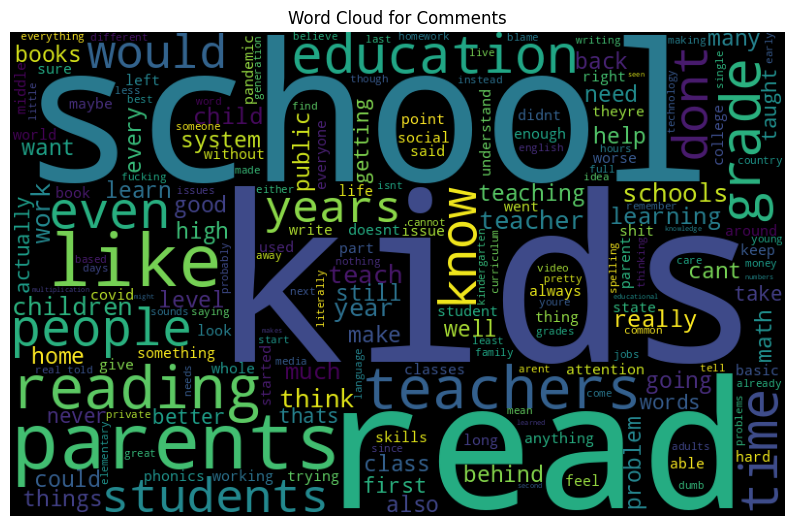

In [175]:
all_words = ' '.join([text for text in reddit_data1['comment']])  # Loop through all comments, join all comments by a space
count_word = collections.Counter(all_words.split())     # Counter counts each word in all_words and stores it as dict with word as key and count as value

wordcloud = WordCloud(width=800, height=500)            # Generate a wordcloud image with specified width and height
wordcloud.generate_from_frequencies(count_word)         # Generate cloud using frequencies from count_word
plt.figure(figsize=(10, 7)) # In inches
plt.imshow(wordcloud)                                   # Render my wordcloud image
plt.axis("off")                                         # I do not need axis in this case
plt.title('Word Cloud for Comments')                    # I want a title
plt.show()                                              # Show the image/plot after everything above is rendered

## **Sentiment Analysis**

In [151]:
#import necessary libraries
from textblob import TextBlob

def get_polarity(text):
    analysis = TextBlob(text)
    #analysis.sentiment returns a named tuple Sentiment(polarity, subjectivity)
    return analysis.sentiment.polarity  #returns the polarity from Sentiment tuple

def get_subjectivity(text):
    analysis = TextBlob(text)
    #analysis.sentiment returns a named tuple Sentiment(polarity, subjectivity)
    return analysis.sentiment.subjectivity  #returns the subjectivity from Sentiment tuple

reddit_data1['polarity'] = reddit_data1['comment'].apply(get_polarity)
reddit_data1['subjectivity'] = reddit_data1['comment'].apply(get_subjectivity)
reddit_data1.head()

,comment,ups,created,date_time,date,tokenized,polarity,subjectivity
0,welcome tiktokcringe message directed newcomer...,1,1.701589e+09,2023-12-03 07:43:36,2023-12-03,"[welcom, tiktokcring, messag, direct, newcom, ...",0.246667,0.521581
1,year educator much worse think picture giving ...,2501,1.701607e+09,2023-12-03 12:37:03,2023-12-03,"[year, educ, much, wors, think, pictur, give, ...",-0.091667,0.291667
2,theres podcast outlines lucy calkins sold read...,838,1.701617e+09,2023-12-03 15:30:24,2023-12-03,"[there, podcast, outlin, luci, calkin, sold, r...",0.000000,0.000000
3,think back late elementary school sure youd st...,1644,1.701590e+09,2023-12-03 07:52:24,2023-12-03,"[think, back, late, elementari, school, sure, ...",0.048067,0.512624
4,work education related field endemic theyre tu...,921,1.701593e+09,2023-12-03 08:43:02,2023-12-03,"[work, educ, relat, field, endem, theyr, turn,...",0.071429,0.411905


In [152]:
# Create a function to classify the polarity

def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        return 'Positive Sentiment'
    elif sentiment_polarity == 0:
        return 'Neutral Sentiment'
    else:
        return 'Negative Sentiment'

In [153]:
#create a sentiment column with the function created:
reddit_data1['sentiment'] = reddit_data1['comment'].apply(analyze_sentiment)
reddit_data1.head()

,comment,ups,created,date_time,date,tokenized,polarity,subjectivity,sentiment
0,welcome tiktokcringe message directed newcomer...,1,1.701589e+09,2023-12-03 07:43:36,2023-12-03,"[welcom, tiktokcring, messag, direct, newcom, ...",0.246667,0.521581,Positive Sentiment
1,year educator much worse think picture giving ...,2501,1.701607e+09,2023-12-03 12:37:03,2023-12-03,"[year, educ, much, wors, think, pictur, give, ...",-0.091667,0.291667,Negative Sentiment
2,theres podcast outlines lucy calkins sold read...,838,1.701617e+09,2023-12-03 15:30:24,2023-12-03,"[there, podcast, outlin, luci, calkin, sold, r...",0.000000,0.000000,Neutral Sentiment
3,think back late elementary school sure youd st...,1644,1.701590e+09,2023-12-03 07:52:24,2023-12-03,"[think, back, late, elementari, school, sure, ...",0.048067,0.512624,Positive Sentiment
4,work education related field endemic theyre tu...,921,1.701593e+09,2023-12-03 08:43:02,2023-12-03,"[work, educ, relat, field, endem, theyr, turn,...",0.071429,0.411905,Positive Sentiment


In [154]:
# Create a new subjectivity column
reddit_data1['subjectivity2'] = np.where(reddit_data1['subjectivity'] > 0.5, 'Subjective', 'Objective')
reddit_data1.head()

,comment,ups,created,date_time,date,tokenized,polarity,subjectivity,sentiment,subjectivity2
0,welcome tiktokcringe message directed newcomer...,1,1.701589e+09,2023-12-03 07:43:36,2023-12-03,"[welcom, tiktokcring, messag, direct, newcom, ...",0.246667,0.521581,Positive Sentiment,Subjective
1,year educator much worse think picture giving ...,2501,1.701607e+09,2023-12-03 12:37:03,2023-12-03,"[year, educ, much, wors, think, pictur, give, ...",-0.091667,0.291667,Negative Sentiment,Objective
2,theres podcast outlines lucy calkins sold read...,838,1.701617e+09,2023-12-03 15:30:24,2023-12-03,"[there, podcast, outlin, luci, calkin, sold, r...",0.000000,0.000000,Neutral Sentiment,Objective
3,think back late elementary school sure youd st...,1644,1.701590e+09,2023-12-03 07:52:24,2023-12-03,"[think, back, late, elementari, school, sure, ...",0.048067,0.512624,Positive Sentiment,Subjective
4,work education related field endemic theyre tu...,921,1.701593e+09,2023-12-03 08:43:02,2023-12-03,"[work, educ, relat, field, endem, theyr, turn,...",0.071429,0.411905,Positive Sentiment,Objective


In [155]:
# Counting the number of sentiment for each case of positive, negative and neutral.
reddit_data1['sentiment'].value_counts()

Positive Sentiment    1499
Negative Sentiment     938
Neutral Sentiment      765
Name: sentiment, dtype: int64

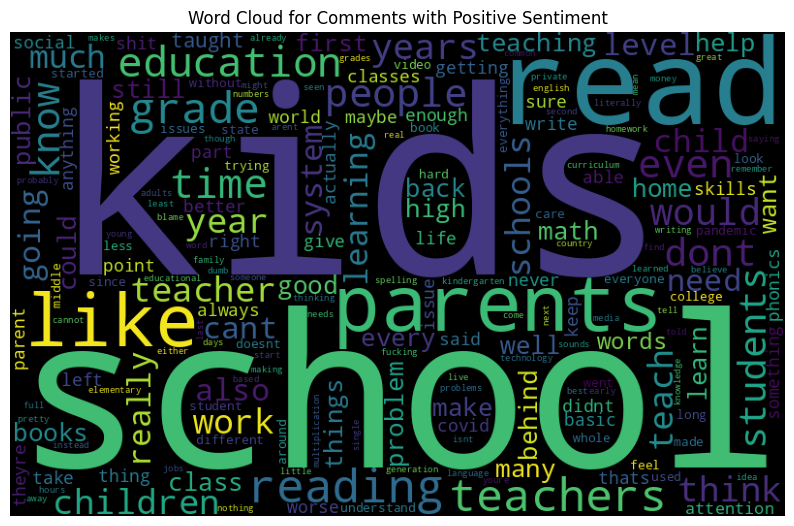

In [176]:
#Creating a word cloud for positive comments
#Create a new column 'sentiment_category' using the analyze_sentiment function
reddit_data1['sentiment_category'] = reddit_data1['comment'].apply(analyze_sentiment)

# Filter only positive sentiment comments
positive_comments_df = reddit_data1[reddit_data1['sentiment_category'] == 'Positive Sentiment']

# Join all positive comments into a single string
all_positive_words = ' '.join([text for text in positive_comments_df['comment']])

# Count word frequencies for positive comments
count_positive_words = collections.Counter(all_positive_words.split())

# Generate a word cloud for positive comments
wordcloud_positive = WordCloud(width=800, height=500)
wordcloud_positive.generate_from_frequencies(count_positive_words)

# Plot the word cloud for positive comments
wordcloud = WordCloud(width=800, height=500)
wordcloud.generate_from_frequencies(count_word)
plt.figure(figsize=(10, 7)) # In inches
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for Comments with Positive Sentiment')
plt.show()

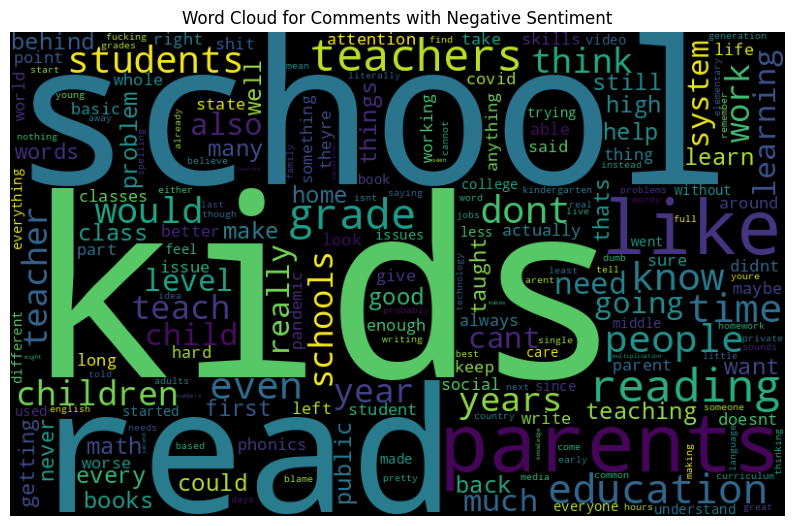

In [178]:
# Filter only negative sentiment comments
negative_comments_df = reddit_data1[reddit_data1['sentiment_category'] == 'Negative Sentiment']

# Join all negative comments into a single string
all_negative_words = ' '.join([text for text in negative_comments_df['comment']])

# Count word frequencies for negative comments
count_negative_words = collections.Counter(all_negative_words.split())

# Generate a word cloud for negative comments
wordcloud_negative = WordCloud(width=800, height=500)
wordcloud_negative.generate_from_frequencies(count_negative_words)

# Plot the word cloud for negative comments
wordcloud = WordCloud(width=800, height=500)
wordcloud.generate_from_frequencies(count_word)
plt.figure(figsize=(10, 7)) # In inches
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for Comments with Negative Sentiment')
plt.show()

In [156]:
# Counting the number of sentiment for each case of objective and subjective
reddit_data1['subjectivity2'].value_counts()


Objective     2131
Subjective    1071
Name: subjectivity2, dtype: int64

In [157]:
# Summary Statistics of polarity and subjectivity
pol_sub = reddit_data1[["polarity", "subjectivity"]]
pol_sub.describe()

,polarity,subjectivity
count,3202.000000,3202.000000
mean,0.037127,0.389738
std,0.230849,0.265836
min,-1.000000,0.000000
25%,-0.033036,0.200000
50%,0.000000,0.412428
75%,0.150000,0.559014
max,1.000000,1.000000


In [78]:
# Crosstabs
pd.crosstab(reddit_data1['sentiment'], reddit_data1['subjectivity2'])

subjectivity2,Objective,Subjective
sentiment,,
Negative Sentiment,503,436
Neutral Sentiment,733,32
Positive Sentiment,896,603


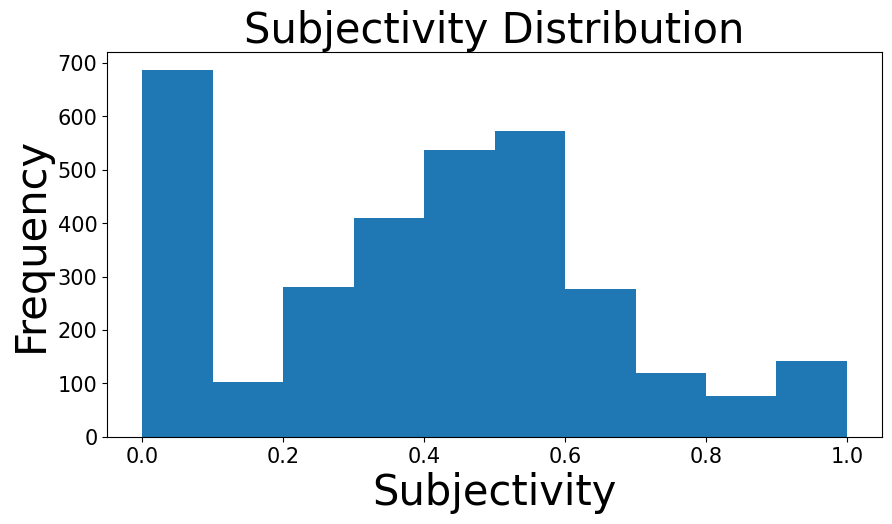

In [158]:
# Histogram of subjectivity
plt.figure(figsize=(10,5))
plt.xlabel('Subjectivity', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(reddit_data1['subjectivity'], bins=10)
plt.title('Subjectivity Distribution', fontsize=30)
plt.show()

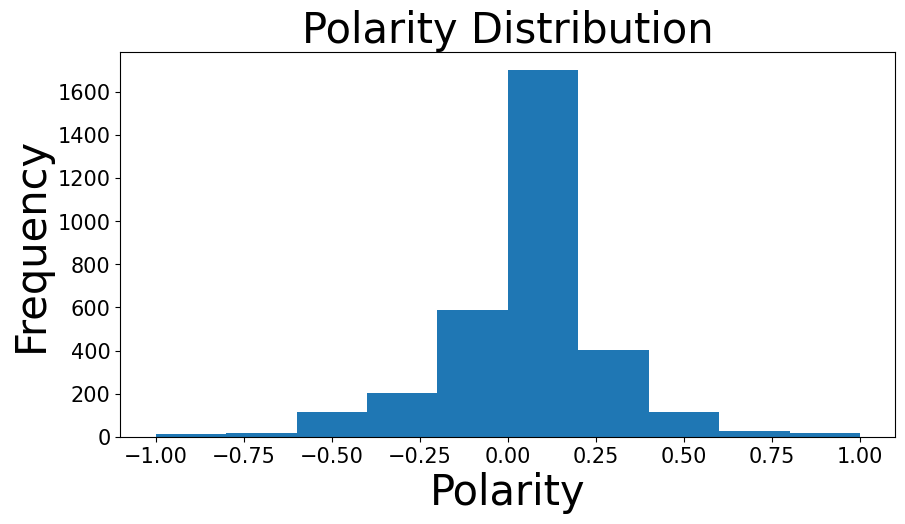

In [159]:
# Histogram of polarity
plt.figure(figsize=(10,5))
plt.xlabel('Polarity', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(reddit_data1['polarity'], bins=10)
plt.title('Polarity Distribution', fontsize=30)
plt.show()

## **Exploratory Analysis**

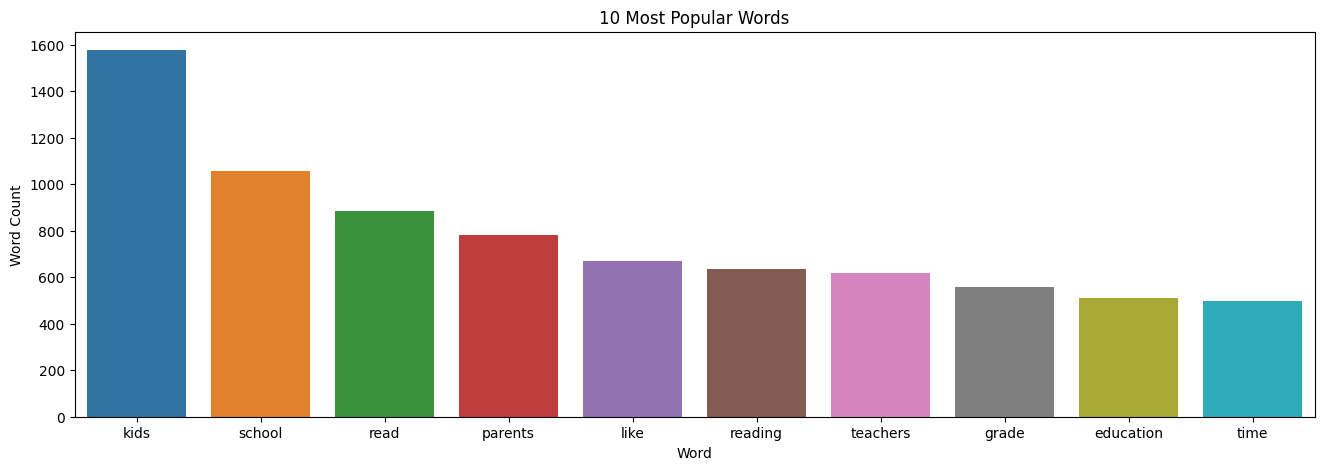

In [181]:
# Creating a frequency distribution to show the frequency of the 10 most used words in the comments
a = nltk.FreqDist(count_word)

# Create a DataFrame from the frequency distribution
d = pd.DataFrame({'Word': list(a.keys()), 'Word Count': list(a.values())})

# Select the top 10 most frequent words
d = d.nlargest(columns="Word Count", n=10)

# Create a bar plot
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Word", y="Word Count")
ax.set(ylabel='Word Count')
plt.title('10 Most Popular Words')
plt.show()

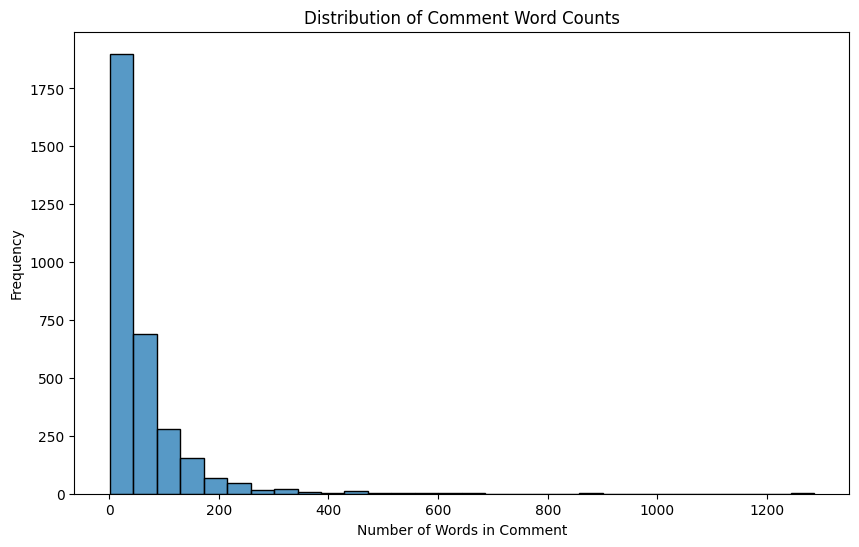

In [162]:
#Creating a histogram that shows the distribution of word counts within comments
comments_df['word_count'] = comments_df['comment'].apply(lambda x: len(x.split()))

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(comments_df['word_count'], bins=30, kde=False)
plt.title('Distribution of Comment Word Counts')
plt.xlabel('Number of Words in Comment')
plt.ylabel('Frequency')
plt.show()
